Jason Smith   
Student ID: 293963   
jsmi268@wgu.edu   
WGU - MSDA  
D207- Data Exploration of Hospital Data  
Program Mentor: Christiana Okhipo  

# Import libraries, set display parameters, import data set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
#import plotnine as p9

# Change display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option("display.max_columns", 100)

# Import Clean Data Set 
meddf = pd.read_csv('med_data_clean.csv', index_col=1)


C:\Users\smith\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# A3: Data Identification

In [2]:
# Describe the variables contained in 'meddf' data frame and output to a file called VariableDesc.xlsx
med_data_fields = meddf.dtypes
# med_data_fields.to_excel(r'VariableDescriptions.xlsx', index = True)
#med_data_fields
meddf.head()

,Unnamed: 0,Interaction,UID,City,State,County,Zip,Latitude,Longitude,Population,Area,Timezone,Job,Education,Employment,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge,Additional_charges,Admissions,Treatment,Visits,Reliability,Options,Hours,Courteous,Dr_comm,Children,Age,Income,Overweight,Anxiety,Initial_days
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C412403,1,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise","Some College, Less than 1 Year",Full Time,Divorced,Male,No,17.802330,6,0,0,No,Emergency Admission,Yes,No,Medium,Yes,Yes,No,Yes,Yes,No,Yes,Blood Work,3191.048774,17939.403420,3,3,2,2,4,3,3,4,3.000000,51.0,46805.99000,1.0,0.320908,15
Z919181,2,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,"Some College, 1 or More Years, No Degree",Full Time,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,No,No,No,No,No,Yes,No,Intravenous,4214.905346,17612.998120,3,4,3,4,4,4,3,3,3.000000,53.0,14370.14000,1.0,0.321309,4
F995323,3,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,"Some College, 1 or More Years, No Degree",Retired,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,No,Yes,No,No,No,No,No,Blood Work,2177.586768,17505.192460,2,4,4,4,3,4,3,3,0.000000,78.0,39741.49000,0.0,0.322654,1
A879973,4,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,GED or Alternative Credential,Retired,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,Yes,No,No,No,No,Yes,Yes,Blood Work,2465.118965,12993.437350,3,5,5,3,4,5,5,5,2.035524,22.0,1209.56000,0.0,0.000000,1
C544523,5,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,Regular High School Diploma,Full Time,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,No,No,Yes,No,Yes,No,No,CT Scan,1885.655137,3716.525786,2,1,3,3,5,3,4,3,2.079285,76.0,40484.44717,1.0,0.000000,5


In [3]:
# Describe dataset 
print("# of rows: ", meddf.shape[0])

# of rows:  9999


In [4]:
meddf.describe()

,Unnamed: 0,Zip,Latitude,Longitude,Population,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,TotalCharge,Additional_charges,Admissions,Treatment,Visits,Reliability,Options,Hours,Courteous,Dr_comm,Children,Age,Income,Overweight,Anxiety,Initial_days
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.000000,50162.829383,38.750924,-91.244184,9962.09761,19.412574,5.012201,1.001500,0.398840,5891.257302,12934.657732,3.518752,3.506751,3.511151,3.515252,3.496950,3.522252,3.493949,3.509751,2.098660,53.296795,40479.829026,0.709214,0.322255,33.938594
std,2886.607005,27468.724995,5.403327,15.206357,14822.13967,6.723606,1.045787,1.008118,0.628507,3377.610179,6542.915985,1.032006,1.034864,1.032794,1.036223,1.030232,1.032130,1.021444,1.042352,1.855754,17.994487,24880.572722,0.431281,0.443767,24.852238
min,1.000000,610.000000,17.967190,-174.209690,0.00000,9.519012,1.000000,0.000000,0.000000,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,154.080000,0.000000,0.000000,1.000000
25%,2500.500000,27600.500000,35.255120,-97.353525,694.50000,16.513078,4.000000,0.000000,0.000000,3252.917043,7986.270943,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,41.000000,23948.445000,0.000000,0.000000,8.000000
50%,5000.000000,50208.000000,39.419060,-88.399240,2765.00000,18.080368,5.000000,1.000000,0.000000,5851.488972,11573.903260,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.058606,53.300937,40484.397510,1.000000,0.000000,34.000000
75%,7499.500000,72412.500000,42.044220,-80.439205,13938.00000,19.789360,6.000000,2.000000,1.000000,7614.327715,15626.601495,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,65.000000,46463.540000,1.000000,1.000000,59.000000
max,9999.000000,99929.000000,70.560990,-65.290170,122814.00000,53.019124,9.000000,7.000000,5.000000,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,89.000000,207249.130000,1.000000,1.000000,71.000000


# B. Describe the Data Analysis

In [5]:
# B1 - chi2_contingency

In [6]:
# B2 - Output from calculations

In [7]:
# create cross tabulation of 'ReAdmis' & 'Services' factors
table = pd.crosstab(meddf.ReAdmis, meddf.Services)
table

Services,Blood Work,CT Scan,Intravenous,MRI
ReAdmis,,,,
No,3335,737,2027,232
Yes,1929,488,1103,148


In [8]:
print(1929/3335)
print(488/737)
print(1103/2027)
print(148 /232)

0.5784107946026986
0.6621438263229308
0.5441539220522941
0.6379310344827587


In [9]:
# chi2_contengency
s,p,c,d =stats.chi2_contingency(table)
print('p-value: ', p)

p-value:  0.03071669781650718


# C. Univariate Analysis:
    Univariate Analysis of two continuous and two categorical variables:
        Continuous: 'Income', 'Age'
        Categorical: 'Treatment', 'ReAdmis'


In [10]:
# Create dataframe for univariate analysis
univ = meddf[['Income', 'Age', 'Treatment', 'ReAdmis']]

# Reset index to standard
univ = univ.reset_index()

# Remove Customer_id
univ.pop('Customer_id')

univ.head()

,Income,Age,Treatment,ReAdmis
0,46805.99000,51.0,3,No
1,14370.14000,53.0,4,No
2,39741.49000,78.0,4,No
3,1209.56000,22.0,5,No
4,40484.44717,76.0,1,No


In [11]:
# Describe univariate statistics: Income, Age, Treatment
univ[['Income', 'Age', 'Treatment']].describe()

,Income,Age,Treatment
count,9999.000000,9999.000000,9999.000000
mean,40479.829026,53.296795,3.506751
std,24880.572722,17.994487,1.034864
min,154.080000,18.000000,1.000000
25%,23948.445000,41.000000,3.000000
50%,40484.397510,53.300937,3.000000
75%,46463.540000,65.000000,4.000000
max,207249.130000,89.000000,7.000000


In [12]:
# Perform value counts on discrete variables
print("ReAdmis value counts")
print(univ['ReAdmis'].value_counts())

ReAdmis value counts
No     6331
Yes    3668
Name: ReAdmis, dtype: int64


In [13]:
# Perform value counts on discrete variables

print("Treatment value counts")
print(univ['Treatment'].value_counts())

Treatment value counts
3    3438
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: Treatment, dtype: int64


# C1. Represent Findings Visually

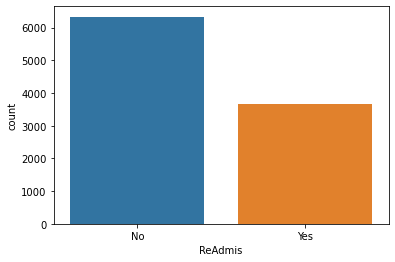

In [14]:
# count plot of discrete univariates
sns.countplot(data = univ
            ,x = 'ReAdmis'
            )

plt.savefig('univ_countplot_readmis.jpg')
plt.show()

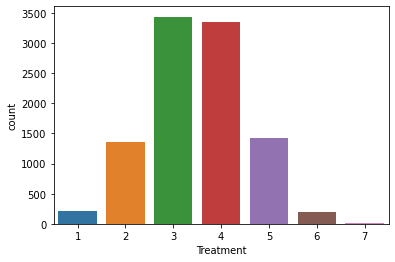

In [15]:
# count plot of discrete univariates
sns.countplot(data = univ
            ,x = 'Treatment'
            )
# plt.savefig('univ_countplot-treatment.jpg')
plt.show()

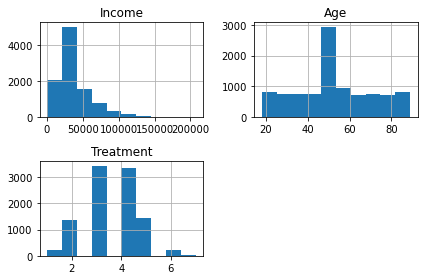

In [16]:
# histograms of continuous univariates: Income & Age
univ[['Income', 'Age', 'Treatment']].hist()
#save figure to file
plt.savefig('univ_hist.jpg')
plt.tight_layout()

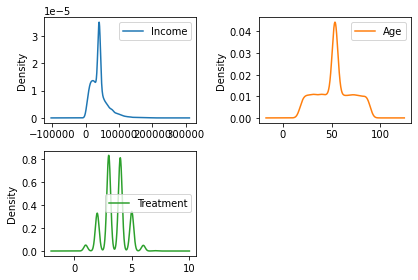

In [17]:
# Density plots of continuous variables: Income & Age

names = univ.columns

# data = read_csv(path, names=names)
univ[['Income', 'Age', 'Treatment', 'ReAdmis']].plot(kind='density', subplots=True, layout=(2,2), sharex=False)
# plt.savefig('univ_density.jpg')
plt.tight_layout()

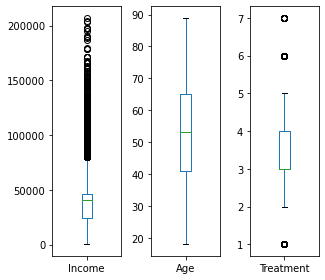

In [18]:
# Box plot
univ.plot(kind='box', subplots=True, layout=(1,4), sharex=False,sharey=False)
# plt.savefig('univ_box.jpg')
plt.tight_layout()


# D. Multivariate Analysis:
    Multivariate Analysis of two continuous and two categorical variables:
        Continuous: 'Inital_days', 'TotalCharge'
        Categorical: 'Treatment', 'ReAdmis'

In [19]:
# Create multivariate dataframe (https://www.kaggle.com/sanikamal/introduction-to-multivariate-analysis)
multiv = meddf[['Initial_days', 'TotalCharge','ReAdmis','Treatment']].reset_index()
multiv.pop('Customer_id')
# Replace values for ReAdmis: No,Yes to 0,1
multiv.ReAdmis =multiv.ReAdmis.replace(to_replace=['No', 'Yes'], value=[0, 1])
X = multiv.loc[:, "Initial_days":] # independent variables data
Y = multiv.ReAdmis # dependednt variable data
print(multiv.head())

   Initial_days  TotalCharge  ReAdmis  Treatment
0            15  3191.048774        0          3
1             4  4214.905346        0          4
2             1  2177.586768        0          4
3             1  2465.118965        0          5
4             5  1885.655137        0          1


In [20]:
# Variables mean values
multiv.apply(np.mean)

Initial_days      33.938594
TotalCharge     5891.257302
ReAdmis            0.366837
Treatment          3.506751
dtype: float64

In [21]:
# Variables standard deviation values
multiv.apply(np.std)

Initial_days      24.850996
TotalCharge     3377.441277
ReAdmis            0.481941
Treatment          1.034812
dtype: float64

In [22]:
corrmat = multiv.corr()
corrmat

,Initial_days,TotalCharge,ReAdmis,Treatment
Initial_days,1.000000,0.554804,0.694569,-0.002597
TotalCharge,0.554804,1.000000,0.557010,-0.018795
ReAdmis,0.694569,0.557010,1.000000,-0.002359
Treatment,-0.002597,-0.018795,-0.002359,1.000000


# D1. Represent Findings Visually

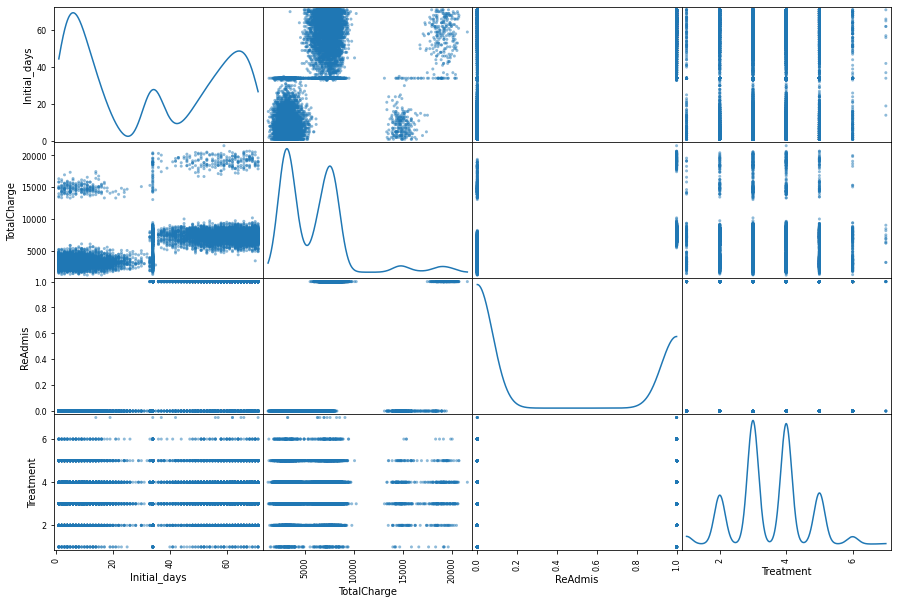

In [23]:
#Scatter plot matrix 
pd.plotting.scatter_matrix(multiv.loc[:, "Initial_days":"Treatment"], diagonal="kde",figsize=(15, 10))
plt.savefig('scatter_plots.jpg')
plt.show()

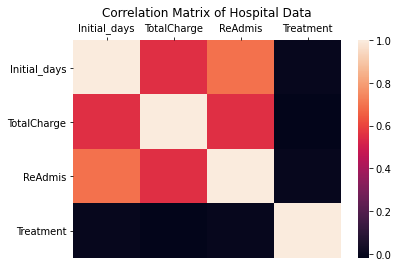

In [24]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()
plt.title('Correlation Matrix of Hospital Data')
plt.savefig('corr_matr.jpg')

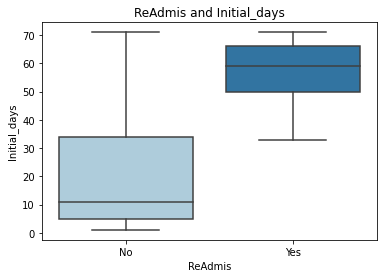

In [25]:
# Boxplot of ReAdmis and Initial_days
sns.boxplot(y="Initial_days", x= "ReAdmis", data = meddf, palette = "Paired")
plt.savefig('boxplot_ReAdmis-Initial_days.jpg')
plt.title("ReAdmis and Initial_days")
plt.show()

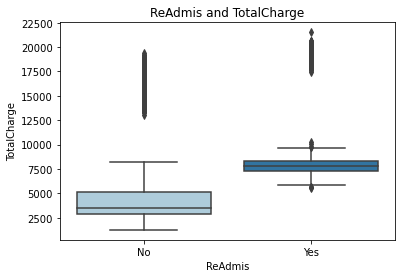

In [26]:
# Boxplot of ReAdmis and TotalCharge
sns.boxplot(y="TotalCharge", x= "ReAdmis", data = meddf, palette = "Paired")
plt.savefig('boxplot_ReAdmis-TotalCharge.jpg')
plt.title("ReAdmis and TotalCharge")
plt.show()

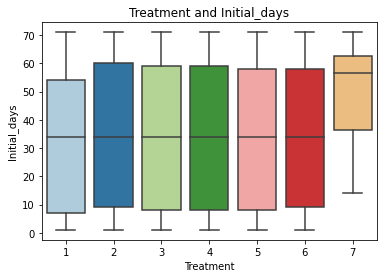

In [27]:
# Boxplot of Treatment and Initial_days
sns.boxplot(y="Initial_days", x= "Treatment", data = meddf, palette = "Paired")
plt.savefig('boxplot_Treatment-Initial_days.jpg')
plt.title("Treatment and Initial_days")
plt.show()

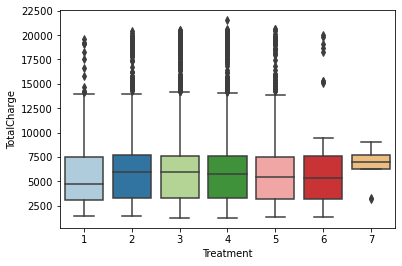

In [28]:
# Boxplot of Treatment and TotalCharge
sns.boxplot(y="TotalCharge", x= "Treatment", data = meddf, palette = "Paired")
# plt.savefig('boxplot_Treatment-TotalCharge.jpg')

plt.show()